### <font color='blue'>1. What is Single-Cell RNA-Seq?</font>

1. What is Single Cell RNA-Seq, and why is it useful?
2. Typical workflow
3. Load, create, and access single-cell datasets in R

#### <font color ='green' >1.1 What is single cell RNA-Seq, and why is it useful?</font>
1. Bulk versus Single-cell RNA-Seq
2. Explore a toy scRNA-Seq dataset
3. Compute Cell coverage

**Bulk  versus single-cell RNA-Seq**

In bulk RNA-Seq data, the data you get from the lab after preprocessing is a matrix of integers where each entry (count) in the matrix corresponds to the number of sequenced reads aligned to each gene and each sample (i.e., a mixture of cells). Does a count have the same meaning in single-cell RNA-Seq data (scRNA-Seq)?

**No, in scRNA-Seq data, a count is the number of sequenced reades aligned for each gene and each cell** italicized text

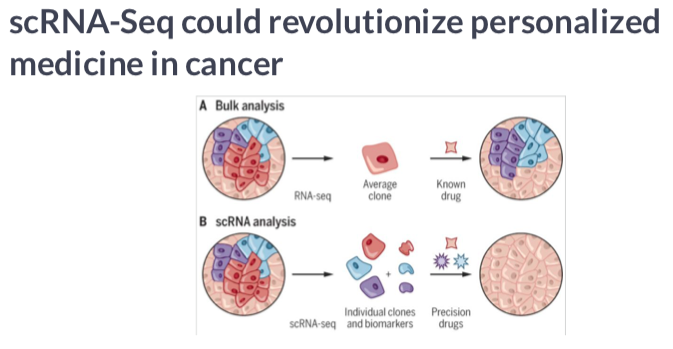

**Explore a toy scRNA-Seq dataset**
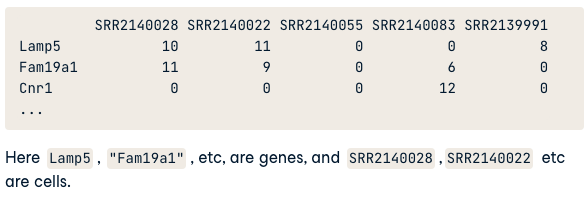

In [ ]:
# print the counts matrix
counts

# reads for "Cnr1" and "SRR2140055"
reads <- counts["Cnr1", "SRR2140055"]
reads

# find the total number of zeros
nbZero <- sum(counts == 0)
nbZero

# find the proportion of zeros
pZero <- mean(counts == 0)
pZero

# find the total counts for each cell
libsize <- colSums(counts)
libsize

**Compute Cell Coverage**
The cell coverage is the proportion of expressed genes for the cell. As we'll see later in the course, it is an important feature in scRNA-Seq. 


In [ ]:
# find cell coverage
cell_info$coverage <- colMeans(counts > 0)

# load ggplot2
library(ggplot2)

# plot cell coverage from matrix cell_info
ggplot(cell_info, aes(x = names, y = coverage)) + 
  geom_col() +
  ggtitle('Cell Coverage') + 
  xlab('Cell Name') + 
  ylab('Coverage')
  
--------------------------------------
>cell_info
                names coverage
SRR2140028 SRR2140028      0.5
SRR2140022 SRR2140022      0.6
SRR2140055 SRR2140055      0.3
SRR2140083 SRR2140083      0.7
SRR2139991 SRR2139991      0.2

####<font color='green'>1.2 Typical workflow</font>
1. GC content
2. Library size
3. Nesting between batches and biology

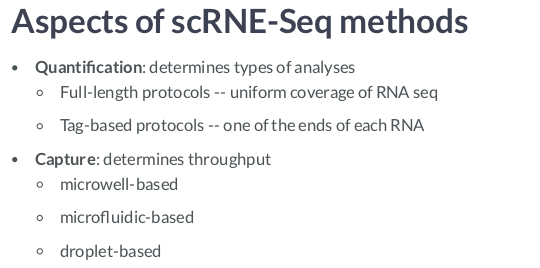


**GC content**

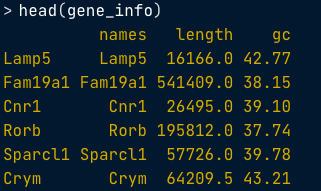

In [ ]:
# mean of GC content
gc_mean <- mean(gene_info$gc)

# standard deviation of GC content
gc_sd <- sd(gene_info$gc)

# boxplot of GC content 
boxplot(gene_info$gc, main = 'Boxplot - GC content', ylab = 'GC content')

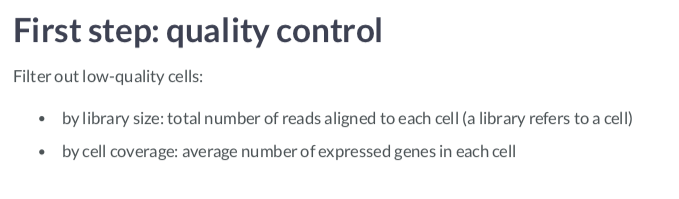
**Library size**
The very first step when working with scRNA-Seq data is to filter out low-quality cells to ensure that technical effects do not distort downstream analysis results. Two common measures of cell quality are the **cell coverage** and **library size.**

What does library size mean?
It is the total sum of counts across all genes for a cell.
press


**Nesting between batches and biology**
In scRNA-Seq data analysis, we want to detect the biological signal of interest (e.g., difference of gene expression in cells from different patients) but remove the technical signals (e.g., difference of gene expression in cells sequenced from different technical batches). When biological (e.g., patients) and technical (e.g., batches) variables are confounded, it could be problematic because the two signals could be difficult to disentangle.

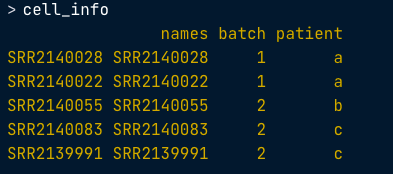

In [ ]:
# batch
batch <- cell_info[,'batch']

# patient
patient <- cell_info[,"patient"]

# nesting of batch within patient
batch_patient <- table(batch, patient)

# explore batch_patient
batch_patient

####<font color='green'>1.3 Load, create, and access single-cell datasets in R</font>
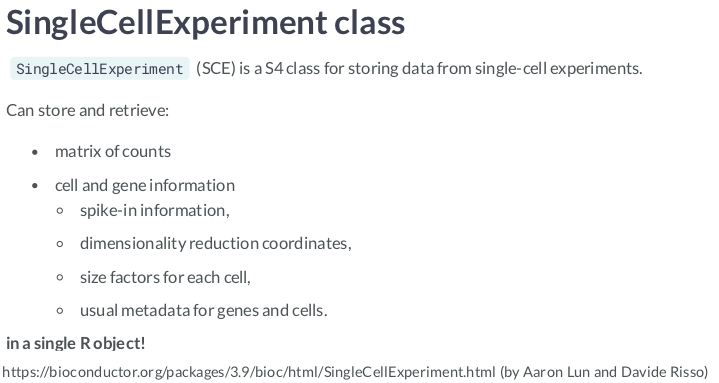

In [ ]:
# load SingleCellExperiment
library(SingleCellExperiment)

# create a SingleCellExperiment object
sce <- SingleCellExperiment(assays = list(counts = counts ),
                            rowData = data.frame(gene_names = rownames(counts)),
                            colData = data.frame(cell_names = colnames(counts)))

# explore sce
sce

**SCE object from SummarizedExperiment**

Another way to create a SingleCellExperiment object is via coercion from an already existing SummarizedExperiment object.

In [ ]:
# create a SummarizedExperiment object from counts
se <- SummarizedExperiment(assays = list(counts = counts))

# create a SingleCellExperiment object from se
sce <- as(se, "SingleCellExperiment")

# explore sce
sce

In [ ]:
# explore dataset allen
allen

# assay(allen): genes(row) * cell(column)

# create SingleCellExperiment object from allen
sce <- as(allen, "SingleCellExperiment")

# explore sce
sce

# size factors
sizeFactors(sce) <- colSums(assay(sce))

### <font color='blue'>2. Quality Control and Normalization</font>
1. Quality control
2. normalization


### <font color='blue' >3.Visualization and Dimensionality Reduction</font>
1. Mouse Epithelium Dataset
2. Visualization
3. Dimensionality Reduction

###<font color='blue' >Cell Clustering and Differential Expression analysis</font>
1. Clustering methods for scRNA-Seq
2. Differential expression analysis
3. Visualization of DE genes